# 5b. Solving Equations

We continue our explorations from Lab 5a. 

----

**Exercise 1:** Develop a function similar to **cbasinPlot** from Lecture 5a, but this plot will only show the points where Newton's method eventually fails. 

Recall, Newton's method for solving for the roots $f(z) = 0$ is given by iterating the **Newton Iterator** $N(z)$ from an initial guess $z_0$.

$$ N(z) =  z - \frac{f(z)}{f'(z)}$$

We say Newton's method fails **immediately** with initial condition $z_0$ if the above expression does not make sense, i.e. $f'(z_0)=0$. 

We say Newton's method fails in **one step** at $z_0$ if, after applying the Newton iterator once, Newton's method fails, i.e. $f'(N(z_0)) = 0$.  

We say Newton's method fails **after $n$ steps** if after applying the Newton iterator $n$ times, you get a number where the Newton Iterator is undefined.   To give this some notation, define $N^{(2)}(z) = N(N(z))$, $N^{(3)}(z) = N(N(N(z)))$, etc, $N^{(n)}(z) = N(N(\cdots N(z) \cdots ))$. Thus the $n$-step failure set $F(n)$ is defined as 

$$F(n) = \{ z_0 : f'(N^{(n)}(z_0))=0 \}$$

Thus, $N^{-1}(F(n)) = F(n+1)$, i.e. we have a recursively-defined set $F(n)$.

(a) Plot the sets $F(0), F(1), F(2), F(3), \cdots$ in the region $-1.3 \leq z.real \leq 1.3$, $-1.3 \leq z.imag \leq 1.3$ for $f(z)=z^3-1$.

(b) Do the same for $f(z) = z^5-z-1$.

**Hint:** For this problem you will need to iteratively solve for the roots of various polynomial equations. I suggest using **np.roots** or **mpmath.polyroots**, like in Lecture 3c. A sympy polynomial $p(z)$ can be converted to a numpy/mpmath polynomial via `p.as_poly(z).all_coeffs()`. See the example below.

In [1]:
## immediate failure points, roots of f'(z)=0
## n-th order failure will have form
## f(z)+f'(z)(p-z)=0 where p is (n-1)-th order.

import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

z = sp.Symbol('z')
P = (z**2+1)
npp = P.as_poly(z).all_coeffs()
sp.pprint(P)
print("Numpy format: ", npp)
print("Roots: ", np.roots(npp))

 2    
z  + 1
Numpy format:  [1, 0, 1]
Roots:  [-0.+1.j  0.-1.j]


Note, $F(n+1) = N^{-1}(F(n))$ so...
$$F(n+1) = \{ z : f(z)-f'(z)(z-r) = 0, r \in F(n) \}$$

In [2]:
P = z**3 - 1

## points of failure list F[n]
F = []

F0 = list(set(np.roots(P.diff(z).as_poly(z).all_coeffs())))
F.append(F0)
print(F)
##i.e. it initially fails only at zero.

[[0.0]]


In [3]:
# want to write a for loop that in each iteration: substitute the r in the above equation
# then save it into a list
f = sp.Function('f')
z = sp.Symbol('z')
r = sp.Symbol('r')

def funct(f):
    '''
    Input: 
        - f = function f (i.e z**3 - 1)
    Output:
        - List of roots after certain number of iterations
        - A scatterplot of said roots (failure points) on complex plane.
        Comment: The grading script doesn't like my output, esp for the 2nd function even though I got 100 ouputs.
        Either my answer is wrong or the script is acting janky. Please take a look and let me know in the feedback.
    '''
    #f = z**3 -1 
    df = f.diff(z)
    P = f - df*(z-r) 

    F = []
    F0 = list(set(np.roots(f.diff(z).as_poly(z).all_coeffs())))
    F.append(F0)
    print("F list after iteration 0:")
    print(np.around(F,5))
    templist2 = []
    #print(len(F0))
    #print("initial F list: ",F)
    for x in range(1,5): # Since iteration F(0) is outside of the loop
        templist1 = []
        ## This for-loop loops through all the element in the list containing most recent
        ## roots, substitute then into the equation, convert them into numpy complex form, 
        ## then solve and store the new roots into a temporary list templist1
        #print(len(templist2))
        if len(F) <= 2:
            #print("case 1")
            for y in range(0, len(F)-len(templist2)):
                for i in (F[-y-1]):
                    #print("initial root i = ", np.around(i,5))
                    P = f - df*(z-r) 
                    P = P.subs(r, i)
                    list2 = [complex(i) for i in P.as_poly(z).all_coeffs()]
                    rootlist = list(set(np.roots(list2))) #temporary list to store roots of each 
                    templist1.append(rootlist)
                    #print("templist1 =", np.around(templist1,5))
        else:
            #print("case 2")
            #print("len F",len(F))
            #print("len templist2",len(templist2))
            #print("templist2", templist2)
            for y in range(len(templist2)):
                for i in templist2[y]:
                    #print("initial root i = ", np.around(i,5))
                    P = f - df*(z-r) 
                    P = P.subs(r, i)
                    list2 = [complex(i) for i in P.as_poly(z).all_coeffs()]
                    rootlist = list(set(np.roots(list2))) #temporary list to store roots of each 
                    templist1.append(rootlist)
                

        ## By now, templist1 should be full of new roots
        ## Want to append it into F list
        templist2 = []
        for i in range(len(templist1)):
            #print('t', np.around(templist1[i],5))
            F.append(templist1[i])
            templist2.append(templist1[i])
        print('F(', x ,'):') 
        print(np.around(templist1,5))
        #print("len F(x)",len(np.around(templist1,5)))
        #print("F list:",F)

    # Plot a scatterplot of points of failure
    for i in F:
        R = [complex(a) for a in i]  
        plt.plot([x.real for x in R],[x.imag for x in R], 'ro', alpha = 0.5)
        plt.title('Scatterplot of failure points')
        plt.xlabel('Real')
        plt.ylabel('Imaginary')


F list after iteration 0:
[[0.]]
F( 1 ):
[[-0.7937 +0.j       0.39685+0.68736j  0.39685-0.68736j]]
F( 2 ):
[[ 0.12161+0.57788j  0.12161-0.57788j -1.43378+0.j     ]
 [-0.56126+0.18362j  0.43965-0.39426j  0.71689+1.24169j]
 [ 0.43965+0.39426j -0.56126-0.18362j  0.71689-1.24169j]]
F( 3 ):
[[ 0.39528-0.46355j  0.43895+1.10793j -0.65181+0.22243j]
 [ 0.39528+0.46355j -0.65181-0.22243j  0.43895-1.10793j]
 [ 0.04941+0.46886j  0.04941-0.46886j -2.24947+0.j     ]
 [ 0.20381-0.57409j  0.13328+0.6757j  -1.17898+0.17382j]
 [ 0.74002-0.93411j -0.59908-0.11055j  0.51853+0.45327j]
 [ 0.38134-0.27722j -0.43075+0.19165j  1.12474+1.9481j ]
 [ 0.74002+0.93411j -0.59908+0.11055j  0.51853-0.45327j]
 [ 0.20381+0.57409j  0.13328-0.6757j  -1.17898-0.17382j]
 [-0.43075-0.19165j  0.38134+0.27722j  1.12474-1.9481j ]]
F( 4 ):
[[ 0.48809+0.44529j  0.70569-1.00644j -0.60087-0.13418j]
 [ 0.3767 -0.3271j   0.75267+1.7605j  -0.47094+0.2285j ]
 [ 0.1869 -0.55369j  0.09783+0.65978j -1.26244+0.22755j]
 [ 0.48809-0.44529j 

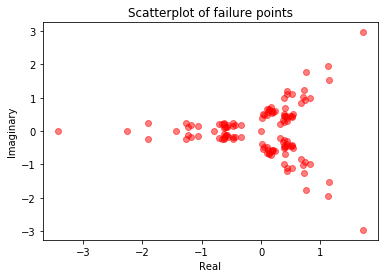

In [4]:
funct(z**3-1)

F list after iteration 0:
[[-0.66874+0.j       0.     +0.66874j  0.66874+0.j       0.     -0.66874j]]
F( 1 ):
[[-0.94138-0.j      -0.32828+0.4854j   0.38101+0.33321j -0.32828-0.4854j
   0.38101-0.33321j]
 [-0.26309+0.96967j  0.48785+0.73405j -0.14664-0.6533j   0.6479 -0.25804j
  -0.72602+0.04355j]
 [ 0.90417+0.41812j -0.12639+0.7538j  -0.71963-0.j      -0.12639-0.7538j
   0.90417-0.41812j]
 [-0.26309-0.96967j  0.48785-0.73405j -0.14664+0.6533j   0.6479 +0.25804j
  -0.72602-0.04355j]]
F( 2 ):
[[-0.22979+0.26327j  0.23352+0.21638j -0.22979-0.26327j  0.23352-0.21638j
  -1.18417-0.j     ]
 [-0.45939+0.84439j  0.56836-0.2718j  -0.17857-0.61361j -0.75229+0.0711j
   0.41154+0.57667j]
 [ 0.76917+0.63066j -0.163  +0.81278j  0.74612-0.33311j -0.1488 -0.70926j
  -0.72724+0.01544j]
 [-0.45939-0.84439j  0.41154-0.57667j -0.17857+0.61361j -0.75229-0.0711j
   0.56836+0.2718j ]
 [ 0.76917-0.63066j -0.1488 +0.70926j -0.163  -0.81278j  0.74612+0.33311j
  -0.72724-0.01544j]
 [ 0.29995+0.72757j -0.12072-0

F( 4 ):
[[-0.28496-0.42634j  0.35268-0.28491j  0.32557+0.32051j -0.34232+0.40695j
  -1.01777+0.03386j]
 [-0.71873+0.07216j  0.34311+0.65431j  0.59185-0.22227j -0.51514+1.04957j
  -0.14064-0.61347j]
 [-0.40379-0.96534j  0.60487+0.2521j  -0.15505+0.62904j  0.41289-0.65582j
  -0.73146-0.0604j ]
 ...
 [ 0.41579+0.69789j  0.62123-0.24442j -0.14637-0.63611j -0.35554+1.0113j
  -0.72521+0.05494j]
 [ 0.37342-0.72553j  0.62409+0.22542j -0.71701-0.05604j -0.13519+0.63324j
  -0.35843-1.0959j ]
 [-0.98309-0.01241j -0.3324 -0.44427j  0.36251+0.30966j -0.31045+0.44964j
   0.35263-0.32307j]]


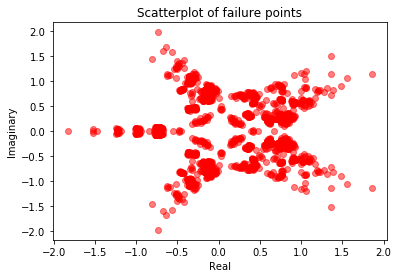

In [5]:
funct(z**5 -z - 1)

----

**Exercise 2:** Implement a version of [Laguerre's Method](https://en.wikipedia.org/wiki/Laguerre's_method).  This is a technique of finding roots of polynomials, which involves iteration.  In the case of Laguerre's method, the iterator is
$$ z \longmapsto z - \frac{n}{G \pm \sqrt{(n-1)(nH-G^2)}}$$
where
$$G = \frac{p'(z)}{p(z)}, H=G(z)^2 - \frac{p''(z)}{p(z)}.$$
$n$ is the degree of the polynomial, $p$. The sign of the $\pm$ is chosen to maximize the modulus of the denominator.  Make a basins of attraction plot, similar to the material in Lecture 5a. How does this method compare? Try several different polynomials.